In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller,acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sms


In [2]:
missing_values=["na","-","I"] # POUR REMPLACER LES VALEURS MANQUANTE EN NAN
bokhol=pd.read_excel('basedonnees.xlsx',na_values=missing_values,index_col=[0],parse_dates=True)
import warnings
warnings.filterwarnings('ignore')

In [3]:
bokhol.head()

,W2- Irradiance (W/m²),W3 - Irradiance (W/m²),W4 - Irradiance (W/m²),Temperature ambiante (°C),Vitesse du vent (m/s),Température module (°C),Production Centrale Meter 1 - (W)
Date (+00:00),,,,,,,
2021-01-01 00:05:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:10:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:15:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:20:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:25:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0


In [4]:
bokhol.isnull().sum()

W2- Irradiance (W/m²)                 50
W3 - Irradiance (W/m²)                59
W4 - Irradiance (W/m²)                57
 Temperature ambiante (°C)            45
 Vitesse du vent (m/s)                42
Température module (°C)              247
Production Centrale Meter 1 - (W)    617
dtype: int64

In [5]:
bokhol=bokhol.dropna(axis=0)
bokhol.isnull().sum()

W2- Irradiance (W/m²)                0
W3 - Irradiance (W/m²)               0
W4 - Irradiance (W/m²)               0
 Temperature ambiante (°C)           0
 Vitesse du vent (m/s)               0
Température module (°C)              0
Production Centrale Meter 1 - (W)    0
dtype: int64

In [6]:
liste=list(bokhol.columns)
list_1=liste[0:5]

production=bokhol.drop(list_1,axis=1)

T_module=production.drop(liste[-1],axis=1)
T_module


,Température module (°C)
Date (+00:00),
2021-01-01 00:05:00,25.9
2021-01-01 00:10:00,25.9
2021-01-01 00:15:00,25.9
2021-01-01 00:20:00,25.9
2021-01-01 00:25:00,25.9
...,...
2021-12-31 20:40:00,26.8
2021-12-31 20:45:00,26.6
2021-12-31 20:50:00,26.3


<AxesSubplot:xlabel='Date (+00:00)'>

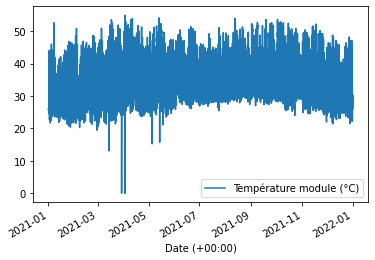

In [7]:
T_module.plot()

La stationnarite de la serie de valeurs de la temperature

Determination de l'odre du modele de prediction 

In [8]:
#long_train=round(T_module.shape[0]*0.8)
#long_test=round(T_module.shape[0]*0.2)
#ON FIXE L'HORIZON DE PREDICTION AVEC LA LONGUEURE DU TREST SPLITS
train_split=T_module.iloc[:-12*24]
test_split=T_module.iloc[-12*24:]


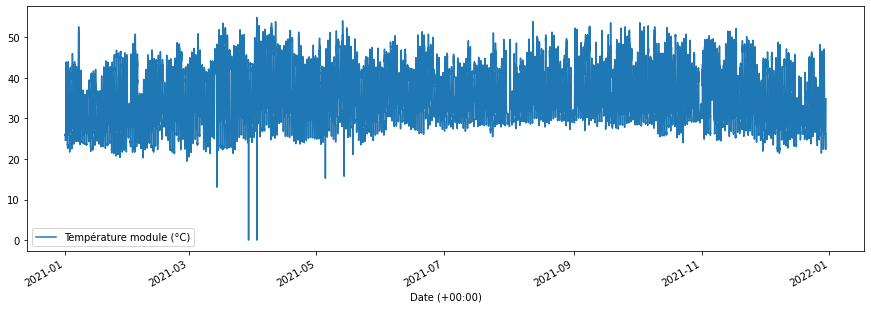

In [9]:
train_split.plot(figsize=(15,5));

Stimation du modele

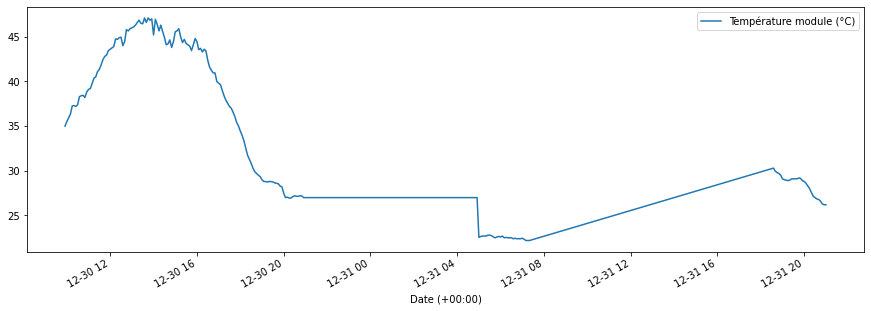

In [10]:
test_split.plot(figsize=(15,5));

In [11]:
modele=ARIMA(train_split,order=(2,1,4))
modele_fit=modele.fit()

validation

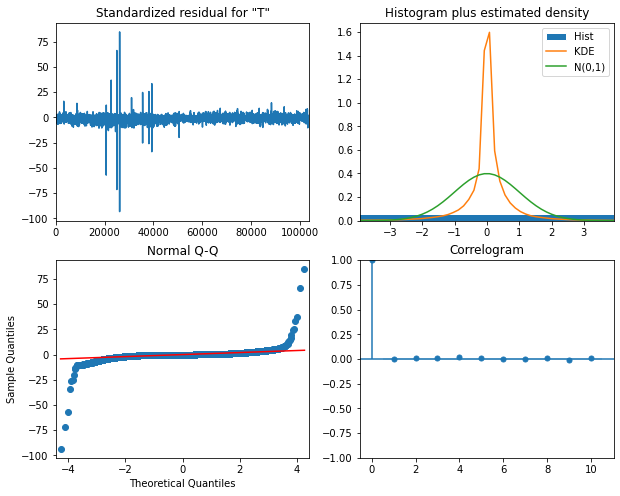

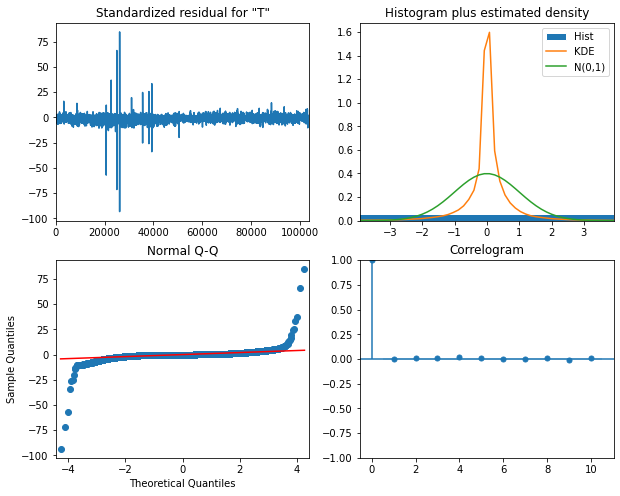

In [ ]:
modele_fit.plot_diagnostics(figsize=(10, 8))

prediction a des dates futures

In [ ]:
prediction=modele_fit.forecast(test_split.shape[0])
prediction.index=test_split.index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


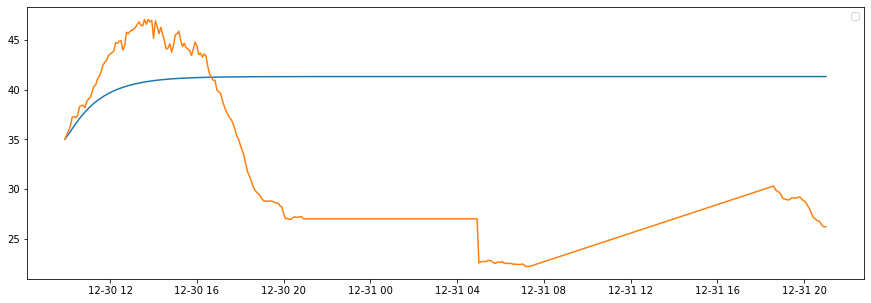

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(prediction)
plt.plot(test_split)
plt.legend();